<a href="https://colab.research.google.com/github/ashmitasaha1/Secure-Aggregation-in-Federated-Learning-Framework/blob/main/N_Client_Chained_Model_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression on Adult Census Dataset

Parameters - <br> <br>
age: the age of an individual <br>
workclass: a general term to represent the employment status of an individual <br>
fnlwgt: final weight. This is the number of people the census believes the entry represents.. <br>
education: the highest level of education achieved by an individual. <br>
education­num: the highest level of education achieved in numerical form. <br>
marital­status: marital status of an individual. <br>
occupation: the general type of occupation of an individual <br>
relationship: represents what this individual is relative to others. <br>
race: Descriptions of an individual’s race <br>
sex: the sex of the individual <br>
capital­gain: capital gains for an individual <br>
capital­loss: capital loss for an individual <br>
hours­per­week: the hours an individual has reported to work per week <br>
native­country: country of origin for an individual <br>
<br>
Data Preprocessing
1.   Replace ? with NaN
2.   Replace NaN with most frequent value since categorical features


###Introduction: Loading dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###Data Pre-processing

####Map income to numerical values

In [ ]:
income_map = {'<=50K': 1, '>50K': 0}
df['income'] = df['income'].map(income_map)

In [ ]:
#Converting it into int value
df['income'] = df['income'].astype('int')

####Drop duplicates

In [ ]:
duplicated_rows = df.duplicated()
any_duplicates = duplicated_rows.any()

print("Duplicated Rows:")
df[duplicated_rows]

Duplicated Rows:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,1
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,1
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,1
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,1
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,1
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,1
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,1
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,1
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,1


In [ ]:
df = df.drop_duplicates()

####Dropping irrelevant columns

In [ ]:
#education.num has the same meaning of education but using number
df = df.drop('fnlwgt',axis=1)

In [ ]:
#fnlwgt is not relevant for training the model
df = df.drop('education.num',axis=1)

####Data Analysis and Feature Engineering

####Replace ? with NaN

In [ ]:
#replace ? with NaN
df[df=='?'] = np.nan

In [ ]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   education       32537 non-null  object
 3   marital.status  32537 non-null  object
 4   occupation      30694 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital.gain    32537 non-null  int64 
 9   capital.loss    32537 non-null  int64 
 10  hours.per.week  32537 non-null  int64 
 11  native.country  31955 non-null  object
 12  income          32537 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


####Replace NaN with mode

In [ ]:
#since features containing null are categorical features, replacing NaN values with mode
for col in ['workclass','occupation','native.country']:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital.status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital.gain    32537 non-null  int64 
 9   capital.loss    32537 non-null  int64 
 10  hours.per.week  32537 non-null  int64 
 11  native.country  32537 non-null  object
 12  income          32537 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


In [ ]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1


In [ ]:
(df == 0).sum()

age                   0
workclass             0
education             0
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29825
capital.loss      31018
hours.per.week        0
native.country        0
income             7839
dtype: int64

####Data Visualization

In [ ]:
categorical = [col for col in df.columns if df[col].dtype == 'object' ]
numerical = [col for col in df.columns if df[col].dtype != 'object' ]

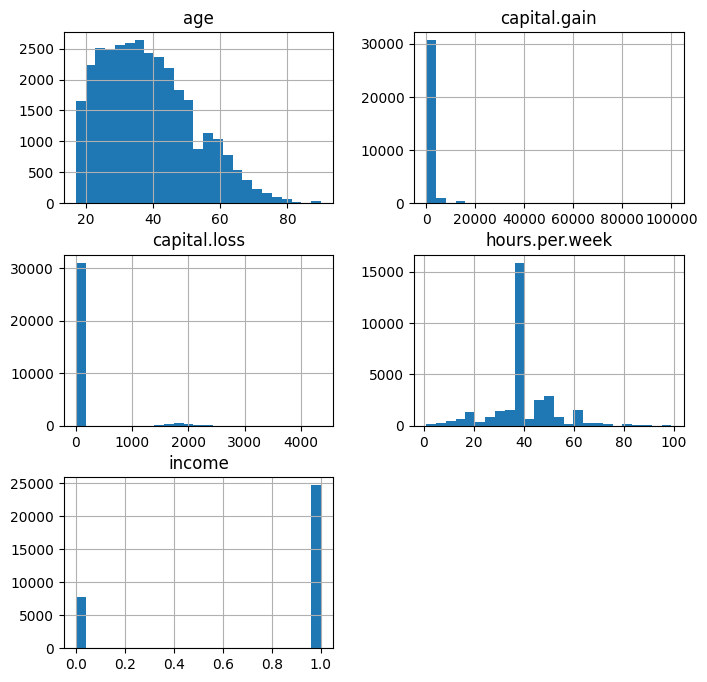

In [ ]:
df[numerical].hist(bins=25, figsize=(8, 8))
plt.show()

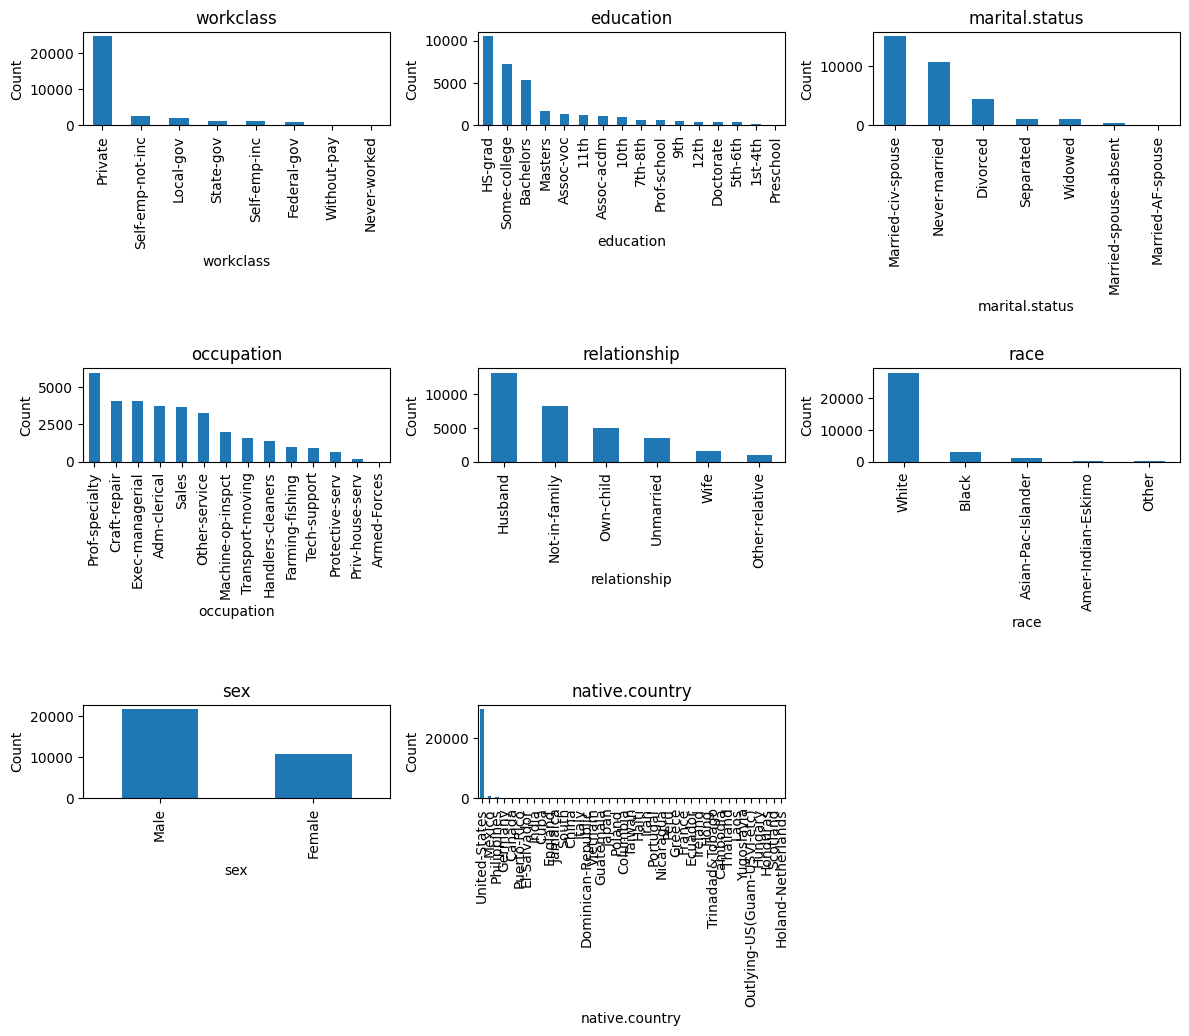

In [ ]:
num_rows = len(categorical)
num_cols = 3

fig = plt.figure(figsize=(12, 25))

for i, col in enumerate(categorical):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

####Group ages

<Axes: xlabel='age', ylabel='Count'>

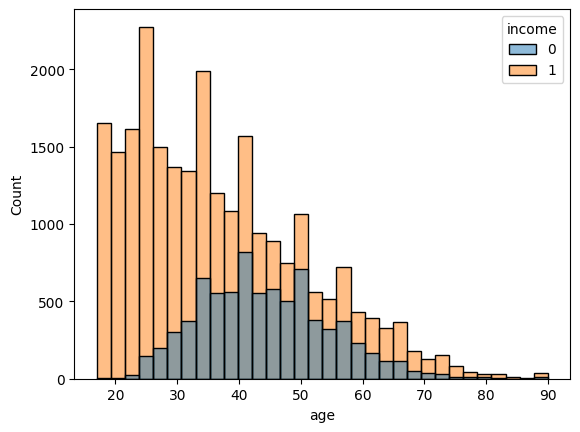

In [ ]:
sns.histplot(df, x='age', hue='income', bins= 32)

In [ ]:
#fuction to organize age in classes
def age_group(df):
    age_bins = [0, 20, 40, 60, float('inf')]
    age_labels = ['1', '2', '3', '4']
    df_age_range = df.copy()
    df_age_range['age'] = pd.cut(df_age_range['age'], bins=age_bins, labels=age_labels)
    return df_age_range

df = age_group(df).copy()

<Axes: xlabel='age', ylabel='Count'>

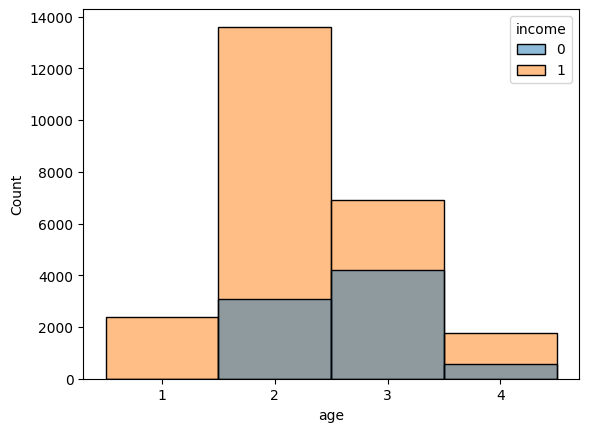

In [ ]:
sns.histplot(df, x='age', hue='income', bins= 32)

In [ ]:
age = pd.get_dummies(df['age'], drop_first=True)
df = df.drop('age',axis=1)

In [ ]:
df = pd.concat([df,age],axis=1)

####workclass

In [ ]:
workclass_labels = df['workclass']
workclass_labels = list(set(workclass_labels))
print(workclass_labels)

['State-gov', 'Local-gov', 'Private', 'Self-emp-not-inc', 'Never-worked', 'Federal-gov', 'Without-pay', 'Self-emp-inc']


<Axes: xlabel='workclass', ylabel='count'>

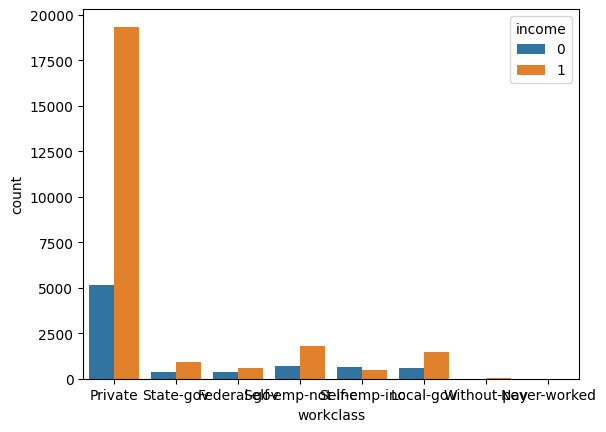

In [ ]:
sns.countplot(data = df, x = 'workclass', hue = 'income')

In [ ]:
df['workclass'] = df['workclass'].apply(lambda x: 1 if x == 'Private' else 0)

<Axes: xlabel='workclass', ylabel='count'>

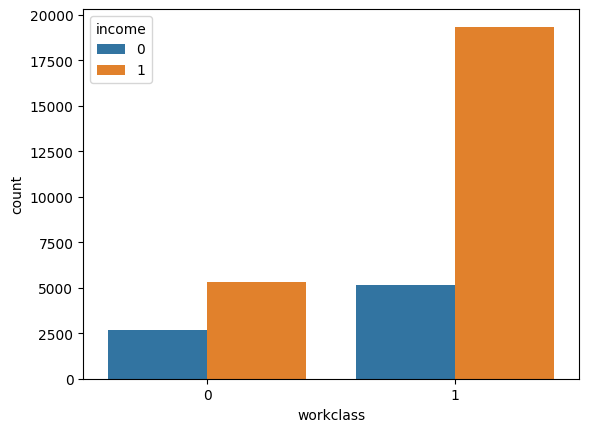

In [ ]:
sns.countplot(data = df, x = 'workclass', hue = 'income')

####Dummy-encoding all the other categorical features

In [ ]:
columns_to_dummy = ['marital.status', 'occupation', 'education',
           'relationship', 'race', 'sex', 'native.country']
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True)

###Prepare dataset:


####split data into training set (80%) and test dataset (20%)


In [ ]:
#test train split
from sklearn.model_selection import train_test_split

data = df
X = data.drop('income',axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
client = pd.concat([X_train,y_train],axis=1)


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.shape


(6508, 91)

In [ ]:
X_train.shape

(26029, 91)

####split training set int  3 subsets for 3 clients

In [ ]:
# Split the data among the clients
n_partitions = 3
data = client
partition_size = (int) (len(data) // n_partitions)
client_data = [] #to store partitions of features+outcome for all clients

for i in range(n_partitions):
  data_partition, data = data.iloc[:partition_size], data.iloc[partition_size:]
  X_client_data = data_partition.drop('income',axis=1)
  y_client_data = data_partition['income']
  data_partition = []
  data_partition.append(X_client_data)
  data_partition.append(y_client_data)
  client_data.append(data_partition)


In [ ]:
client_data

[[       workclass  capital.gain  capital.loss  hours.per.week  2  3  4  \
  20890          1             0             0              40  1  0  0   
  801            1             0          1887              40  1  0  0   
  18377          1             0             0              30  1  0  0   
  7920           1             0             0              50  0  1  0   
  26990          0             0             0              40  0  1  0   
  ...          ...           ...           ...             ... .. .. ..   
  23399          1             0             0              27  0  0  0   
  18980          1             0             0              40  1  0  0   
  12598          1             0             0              50  1  0  0   
  15609          1             0             0              38  0  1  0   
  30756          0             0             0              37  0  1  0   
  
         marital.status_Married-AF-spouse  marital.status_Married-civ-spouse  \
  20890          

###Train Model

####1. Train all data together

In [ ]:
def classify(pred_y):
  pred = pred_y
  for i in range(len(pred)):
    if pred[i] <= pred.mean() :
      pred[i] = 0;
    else:
      pred[i] = 1;
  pred_y = pred
  return pred_y

In [ ]:
# Create and train the first Logistic Regression model
model_total = LinearRegression()
model_total.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data using the global model
y_pred_total = model_total.predict(X_test)
y_pred_total = classify(y_pred_total)

In [ ]:
# Calculate accuracy
accuracy_total = accuracy_score(y_pred_total,y_test)
print("Accuracy:", accuracy_total)

Accuracy: 0.7914874001229256


####2. Train Local models for every client

In [ ]:
# Create and train the first Logistic Regression model
model1 = LinearRegression()
X_train1 = client_data[0][0]
y_train1 = client_data[0][1]
model1.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
# Create and train the second Logistic Regression model
model2 = LinearRegression()
X_train2 = client_data[1][0]
y_train2 = client_data[1][1]
model2.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
# Create and train the third Logistic Regression model
model3 = LinearRegression()
X_train3 = client_data[2][0]
y_train3 = client_data[2][1]
model3.fit(X_train3, y_train3)

LinearRegression()

####3. Local predictions and calculate accuracy

In [ ]:
# Make predictions on the test data using the local models
y_pred1 = model1.predict(X_test)
y_pred1 = classify(y_pred1)
y_pred2 = model2.predict(X_test)
y_pred2 = classify(y_pred2)
y_pred3 = model3.predict(X_test)
y_pred3 = classify(y_pred3)

In [ ]:
# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.7887215734480639


In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.7899508297480025


In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.7917947141979103


####4. Get global model by taking avg of local models

In [ ]:
# Average the coefficients and intercepts of the two models

global_model = copy.deepcopy(model1)

In [ ]:
print(f"coeff={global_model.coef_} intercept={global_model.intercept_}")

coeff=[-5.38645681e-03 -7.58844553e-06 -9.71012529e-05 -2.70209060e-03
  6.37705696e-02 -2.98597920e-02  7.19783376e-02 -4.20086711e-01
 -1.57308509e-01 -2.88904186e-02  1.64924462e-02 -5.25588521e-03
 -4.72225107e-02  3.00415832e-02  3.55328476e-02 -1.10037237e-01
  1.38563423e-01  6.54552944e-02  4.61573855e-02  4.01660622e-02
  7.77794611e-04 -8.66098443e-03 -8.76110628e-03 -2.24560855e-02
 -7.11135796e-02  3.69371213e-02  1.22292320e-02 -4.60094099e-03
  2.18778417e-02  2.41425801e-02  8.70824465e-02  6.32979920e-02
 -9.59114124e-02 -8.77619254e-02 -1.96475199e-01 -4.01981871e-01
 -1.44733390e-02 -2.95642525e-01  1.06213773e-03 -3.56348559e-01
 -7.42723022e-02  1.21388579e-01  1.11682018e-01  1.31178451e-01
  1.17341589e-01 -8.22381497e-02 -7.21424203e-02 -5.29605791e-02
  1.81252875e-02 -4.97493951e-02 -6.27628572e-02 -1.03015530e-01
 -6.25473707e-02  3.07342172e-02 -1.56786478e-01 -9.77810309e-02
 -5.99981562e-03 -6.93973399e-02 -2.18992531e-01 -1.88482834e-01
 -1.00831795e-01  3

In [ ]:
print(f"coeff={model1.coef_} intercept={model1.intercept_}")

coeff=[-5.38645681e-03 -7.58844553e-06 -9.71012529e-05 -2.70209060e-03
  6.37705696e-02 -2.98597920e-02  7.19783376e-02 -4.20086711e-01
 -1.57308509e-01 -2.88904186e-02  1.64924462e-02 -5.25588521e-03
 -4.72225107e-02  3.00415832e-02  3.55328476e-02 -1.10037237e-01
  1.38563423e-01  6.54552944e-02  4.61573855e-02  4.01660622e-02
  7.77794611e-04 -8.66098443e-03 -8.76110628e-03 -2.24560855e-02
 -7.11135796e-02  3.69371213e-02  1.22292320e-02 -4.60094099e-03
  2.18778417e-02  2.41425801e-02  8.70824465e-02  6.32979920e-02
 -9.59114124e-02 -8.77619254e-02 -1.96475199e-01 -4.01981871e-01
 -1.44733390e-02 -2.95642525e-01  1.06213773e-03 -3.56348559e-01
 -7.42723022e-02  1.21388579e-01  1.11682018e-01  1.31178451e-01
  1.17341589e-01 -8.22381497e-02 -7.21424203e-02 -5.29605791e-02
  1.81252875e-02 -4.97493951e-02 -6.27628572e-02 -1.03015530e-01
 -6.25473707e-02  3.07342172e-02 -1.56786478e-01 -9.77810309e-02
 -5.99981562e-03 -6.93973399e-02 -2.18992531e-01 -1.88482834e-01
 -1.00831795e-01  3

In [ ]:
print(f"coeff={model2.coef_} intercept={model2.intercept_}")

coeff=[-1.00678551e-02 -9.16135469e-06 -8.90047029e-05 -3.08310909e-03
  5.96161863e-02 -3.45979183e-02  5.44670406e-02 -5.61343437e-02
 -9.70047350e-02 -1.95025739e-02 -1.26993922e-02 -4.52107862e-02
 -3.63389366e-02  8.25246602e-02  2.29129805e-02 -1.43629258e-01
  1.24612152e-01  5.93782267e-02  5.58028050e-02  2.72730947e-02
 -3.88119985e-02 -4.49982583e-02 -1.29375547e-01 -4.61241024e-02
 -6.87926147e-02  1.99095601e-02  7.98535057e-04 -1.75839433e-02
  2.63599135e-02  6.61577820e-02  7.41174882e-02  1.51577224e-03
 -9.42373467e-02 -1.09728919e-01 -2.04710426e-01 -4.07245484e-01
 -3.60164603e-02 -2.96219619e-01  2.27545605e-02 -3.56895165e-01
 -7.30510946e-02  1.89945003e-01  1.63597734e-01  1.98054622e-01
  1.70822618e-01 -1.21193941e-01 -3.75979243e-02 -2.54913098e-02
  7.20480644e-03 -6.10277019e-02 -5.45797613e-02  1.94862663e-01
  3.63900694e-01  3.23572714e-01  3.74104235e-01  4.12175674e-01
  2.83048433e-01  2.51231085e-01  2.58223515e-01  4.01460845e-01
  1.79758963e-01  2

In [ ]:
print(f"coeff={model3.coef_} intercept={model3.intercept_}")

coeff=[-2.62415653e-02 -7.94022909e-06 -9.56307432e-05 -2.84730567e-03
  5.59968640e-02 -2.49653203e-02  4.39677940e-02 -1.43641090e-01
 -9.90976941e-02 -1.58441465e-02  3.19509464e-02  1.71153177e-03
 -5.65236153e-02  7.85775129e-02  1.48334098e-02 -1.20101907e-01
  1.12217749e-01  4.37860342e-02  4.76903720e-02  2.52873571e-02
  8.91452079e-03 -1.53678972e-02 -5.34412082e-02 -2.78746220e-02
 -7.85103643e-02  5.51529949e-02 -4.61385379e-02 -6.28518237e-02
 -8.61897651e-04  1.78099849e-02  3.12965787e-02  2.92366669e-02
 -1.40587958e-01 -1.29784712e-01 -2.34866707e-01 -4.83282981e-01
 -5.91525267e-02 -3.15588232e-01  1.54607256e-01 -4.26479334e-01
 -1.01517188e-01  1.55942321e-01  1.44123498e-01  1.58189709e-01
  1.56382731e-01 -1.02306601e-01 -3.24513154e-03 -4.65805482e-02
 -3.68208331e-02 -4.21962452e-02 -6.79247970e-02  4.37737259e-01
  5.11457518e-01  5.98390236e-01  3.47999273e-01  5.06730501e-01
  3.33771176e-01  5.08578937e-01  4.27265882e-01  3.26442008e-01
  4.25057930e-01  6

In [ ]:
global_model.coef_ = (model1.coef_ + model2.coef_ + model3.coef_) / 3

In [ ]:
global_model.intercept_ = (model1.intercept_ + model2.intercept_ + model3.intercept_) / 3

In [ ]:
print(f"coeff={global_model.coef_} intercept={global_model.intercept_}")

coeff=[-1.38986257e-02 -8.23000977e-06 -9.39122330e-05 -2.87750179e-03
  5.97945400e-02 -2.98076769e-02  5.68043907e-02 -2.06620715e-01
 -1.17803646e-01 -2.14123797e-02  1.19146668e-02 -1.62517132e-02
 -4.66950209e-02  6.37145854e-02  2.44264126e-02 -1.24589467e-01
  1.25131108e-01  5.62065184e-02  4.98835208e-02  3.09088380e-02
 -9.70656104e-03 -2.30090466e-02 -6.38592871e-02 -3.21516033e-02
 -7.28055195e-02  3.73332254e-02 -1.10369236e-02 -2.83455693e-02
  1.57919525e-02  3.60367824e-02  6.41655045e-02  3.13501437e-02
 -1.10245572e-01 -1.09091852e-01 -2.12017444e-01 -4.30836779e-01
 -3.65474420e-02 -3.02483459e-01  5.94746514e-02 -3.79907686e-01
 -8.29468618e-02  1.55758634e-01  1.39801083e-01  1.62474261e-01
  1.48182313e-01 -1.01912897e-01 -3.76618254e-02 -4.16774791e-02
 -3.83024637e-03 -5.09911140e-02 -6.17558052e-02  1.76528130e-01
  2.70936947e-01  3.17565722e-01  1.88439010e-01  2.73708381e-01
  2.03606598e-01  2.30137561e-01  1.55498955e-01  1.79806673e-01
  1.67995033e-01  3

In [ ]:
type(global_model.coef_)

numpy.ndarray

####5. Global model prediction and accuracy

In [ ]:
# Make predictions on the test data using the global model
y_pred = global_model.predict(X_test)
y_pred = classify(y_pred)

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7919483712354026
